In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy, math

In [190]:
def z_score_normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    print(X_norm)
    return (X_norm, mu, sigma)

In [191]:
dataset = pd.read_csv("canada_per_capita_income.csv")
X_train = dataset.iloc[:, 2:-1].values
y_train = dataset.iloc[:, -1].values
print(X_train)
print(y_train)
X_features=["year", "lifeExp", "pop"]

[[1.9520000e+03 6.8750000e+01 1.4785584e+07]
 [1.9570000e+03 6.9960000e+01 1.7010154e+07]
 [1.9620000e+03 7.1300000e+01 1.8985849e+07]
 [1.9670000e+03 7.2130000e+01 2.0819767e+07]
 [1.9720000e+03 7.2880000e+01 2.2284500e+07]
 [1.9770000e+03 7.4210000e+01 2.3796400e+07]
 [1.9820000e+03 7.5760000e+01 2.5201900e+07]
 [1.9870000e+03 7.6860000e+01 2.6549700e+07]
 [1.9920000e+03 7.7950000e+01 2.8523502e+07]
 [1.9970000e+03 7.8610000e+01 3.0305843e+07]
 [2.0020000e+03 7.9770000e+01 3.1902268e+07]
 [2.0070000e+03 8.0653000e+01 3.3390141e+07]]
[11367.16112 12489.95006 13462.48555 16076.58803 18970.57086 22090.88306
 22898.79214 26626.51503 26342.88426 28954.92589 33328.96507 36319.23501]


In [192]:
def display_x_train(X_train, X_features):
    fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(X_train[:, i], y_train, c="b")
        ax[i].set_xlabel(X_features[i])
    plt.show()

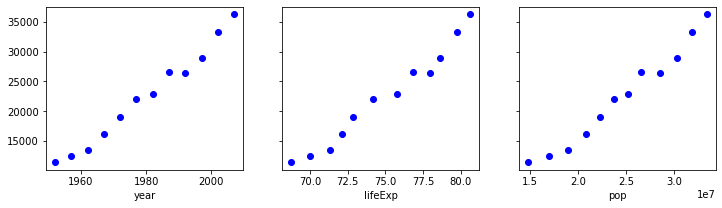

In [193]:
display_x_train(X_train, X_features)

In [196]:
#max_X = copy.deepcopy(X_train[0])
#for i in range(len(X_train)):
#    for j in range(4):
#        max_X[j] = max(max_X[j], X_train[i][j])
#X_train = X_train / max_X


X_train, X_mu, x_sigma = z_score_normalization(X_train)
print(X_mu, x_sigma)
y_train = y_train / 1000

[[-1.59325501 -1.62573914 -1.70140552]
 [-1.30357228 -1.30602123 -1.31029818]
 [-1.01388955 -0.95195346 -0.96294619]
 [-0.72420682 -0.73264283 -0.64052037]
 [-0.43452409 -0.53447058 -0.38300191]
 [-0.14484136 -0.18304511 -0.11719091]
 [ 0.14484136  0.22651089  0.12991364]
 [ 0.43452409  0.51716353  0.36687381]
 [ 0.72420682  0.80517388  0.71389299]
 [ 1.01388955  0.97956546  1.02725092]
 [ 1.30357228  1.28607189  1.30792248]
 [ 1.59325501  1.51938669  1.56950924]]
[3.70074342e-17 2.59052039e-16 2.40548322e-16] [1. 1. 1.]


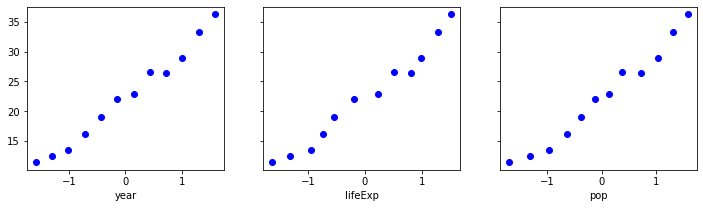

In [197]:
display_x_train(X_norm, X_features)

In [198]:
def compute_train_model(x, w, b):
    m, n = x.shape
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(x[i], w) + b
    return f_wb

In [199]:
def compute_cost(x, y, w, b):
    m, n = x.shape
    j_wb = 0
    
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        j_wb += (f_wb - y[i]) ** 2
    return j_wb / (2 * m)

In [200]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
        
    return dj_dw / m, dj_db / m

In [201]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient):
    m, n = x.shape
    w = copy.deepcopy(w_in)
    b = b_in
    j_hist = []
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 10000:
            j_hist.append(compute_cost(x, y, w, b))
        if i% math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {j_hist[-1]}   ")
    return w, b, j_hist

In [202]:
alpha = 0.01
num_iter = 3000
w_in = np.zeros(X_train.shape[1])
b_in = 0

w, b, j_hist = gradient_descent(X_train, y_train, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient)

Iteration    0: Cost 275.2355590473438   
Iteration  300: Cost 1.2823453291843379   
Iteration  600: Cost 0.6895772454808587   
Iteration  900: Cost 0.6859073567987625   
Iteration 1200: Cost 0.6836665186727034   
Iteration 1500: Cost 0.6814412917004743   
Iteration 1800: Cost 0.6792281872024569   
Iteration 2100: Cost 0.677027108540662   
Iteration 2400: Cost 0.6748379683122501   
Iteration 2700: Cost 0.6726606801944861   


In [203]:
w, b

(array([3.25765067, 2.21244848, 2.30718832]), 22.41074633999819)

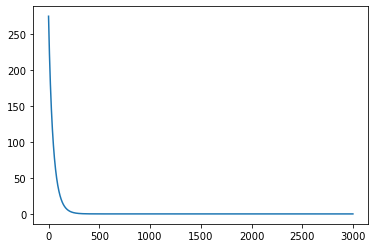

In [204]:
plt.plot(j_hist)
plt.show()

IndexError: index 3 is out of bounds for axis 1 with size 3

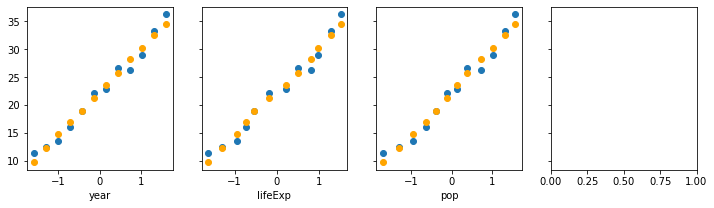

In [205]:
m, n = X_train.shape
yp = np.zeros(m)

for i in range(m):
    yp[i] = np.dot(X_train[i], w) + b
    
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label="target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], yp, c="orange", label="predict")
ax[0].scatter(, w[0])
ax[0].set_ylabel("Price")
ax[0].legend()
plt.show()

In [209]:
print((2020-X_mu[0])/x_sigma[0])

2020.0
